In [37]:
# Import libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [38]:
# Load dataset
url = "SaYoPillow.csv"
data = pd.read_csv(url)

In [39]:
data = data[['sleeping hours','heart rate']]
data.head(25)

,sleeping hours,heart rate
0,1.840,74.20
1,1.552,72.76
2,7.000,60.00
3,0.768,68.84
4,8.248,53.12
5,6.376,58.44
6,7.800,52.00
7,9.000,55.00
8,7.112,50.28
9,6.104,57.76


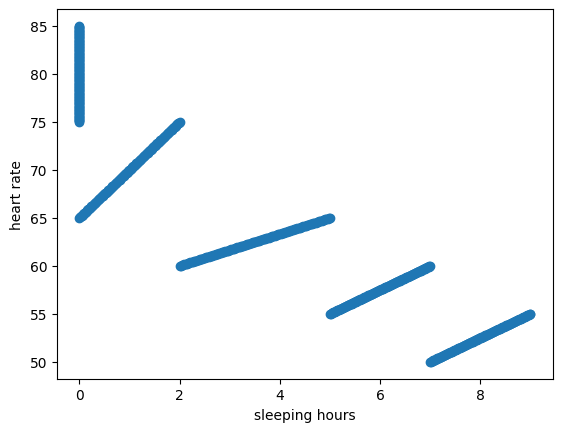

In [40]:

f1 = data['sleeping hours'].values
f2 = data['heart rate'].values

X = np.array(list(zip(f1, f2)))

# Visualisasi data point
plt.scatter(f1, f2)
plt.xlabel('sleeping hours')
plt.ylabel('heart rate')
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi Method
encoder = LabelEncoder()

# Looping
for c in data.columns[0:]:  
    if(data[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        data[c] = encoder.fit_transform(data[c])
    else: # else get the self column value without encode
        data[c] = data[c]



In [42]:
# Menentukan nilai yang tepat untuk cluster
X = np.array(list(zip(f1, f2))).reshape(len(f1), 2)
# print(X)
SSE = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)
  kmeanModel.fit(X)
  SSE.append(kmeanModel.inertia_)

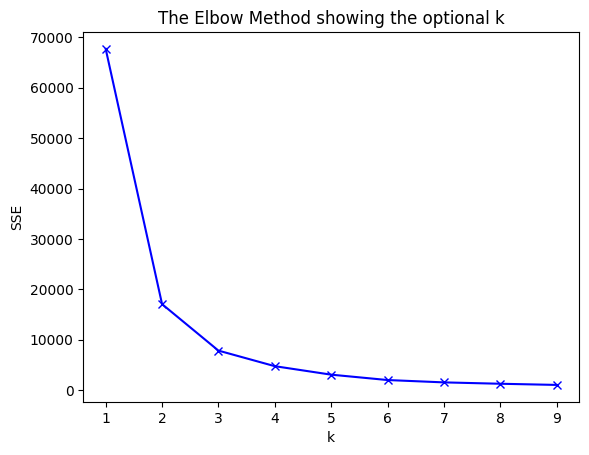

In [69]:
# Plot nilai K untuk mencari elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optional k')
plt.show()

In [74]:
# Melakukan clustering
from sklearn.cluster import KMeans

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# Fitting input data
kmeans = kmeans.fit(X)

# Mendapatkan cluster labels
labels = kmeans.predict(X)

# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
y_kmeans = kmeans.fit_predict(X)
# Mencetak nilai centroid
print(C)

[[ 2.38086957 64.73043478]
 [ 0.43368421 78.22105263]
 [ 7.         55.        ]]


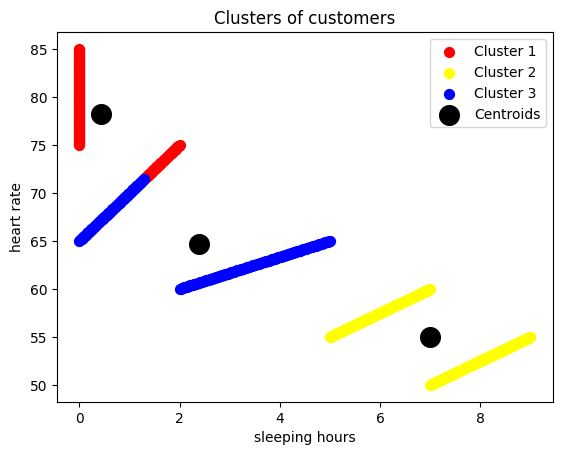

In [76]:
plt.scatter(data[y_kmeans == 0]['sleeping hours'], data[y_kmeans == 0]['heart rate'], s=50, c='red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1]['sleeping hours'], data[y_kmeans == 1]['heart rate'], s=50, c='yellow', label='Cluster 2')
plt.scatter(data[y_kmeans == 2]['sleeping hours'], data[y_kmeans == 2]['heart rate'], s=50, c='blue', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('sleeping hours')
plt.ylabel('heart rate')
plt.legend()
plt.show()

In [77]:
data['Cluster'] = y_kmeans

In [78]:
data.head(10)

,sleeping hours,heart rate,Cluster
0,1.840,74.20,0
1,1.552,72.76,0
2,7.000,60.00,1
3,0.768,68.84,2
4,8.248,53.12,1
5,6.376,58.44,1
6,7.800,52.00,1
7,9.000,55.00,1
8,7.112,50.28,1
9,6.104,57.76,1


In [79]:
# Data type of the Cluster column
data['Cluster'].dtype

dtype('int32')

In [80]:
data['Cluster'].unique()

array([0, 1, 2])

In [81]:
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))